https://www.youtube.com/watch?v=8FCDpFhd1zk

In [16]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
#import statsmodels.api as sm
import datetime

In [17]:
def str_to_datetime(s):
    split_temp = s.split(' ')
    date = split_temp[0].split('/')
    time = []
    time.append(split_temp[1][0:2])
    time.append(split_temp[1][3:5])
    time.append(split_temp[1][6:8])
    year, month, day = int('20' + date[0]), int(date[1]), int(date[2])
    hour, minutes, seconds = int(time[0]), int(time[1]), int(time[2])
    return datetime.datetime(year=year, month=month, day=day, hour=hour,minute=minutes,second=seconds)

In [18]:
df = pd.read_csv('ticket data.csv',index_col=0)
df['Date'] = df['Date'].apply(str_to_datetime)
df.index = df.pop('Date')

In [19]:
df.index = pd.DatetimeIndex(df.index).to_period(freq='H')
df.head()

,Count
Date,
2022-07-01 00:00,362
2022-07-01 01:00,486
2022-07-01 02:00,363
2022-07-01 03:00,225
2022-07-01 04:00,116


In [20]:
df = df[:-5]
df.head(10)

,Count
Date,
2022-07-01 00:00,362
2022-07-01 01:00,486
2022-07-01 02:00,363
2022-07-01 03:00,225
2022-07-01 04:00,116
2022-07-01 05:00,416
2022-07-01 06:00,1050
2022-07-01 07:00,2119
2022-07-01 08:00,4318


<AxesSubplot:xlabel='Date'>

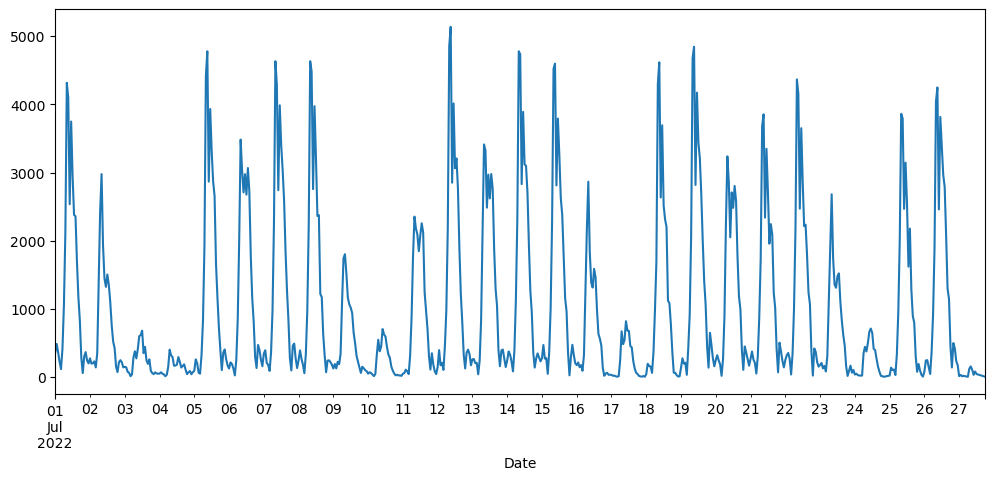

In [21]:
df['Count'].plot(figsize=(12,5))

In [22]:
def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
ad_test(df['Count'])

1. ADF :  -3.0316222520095
2. P-Value :  0.03204496049637048
3. Num Of Lags :  20
4. Num Of Observations Used For ADF Regression: 611
5. Critical Values :
	 1% :  -3.4410979308822967
	 5% :  -2.8662819588823423
	 10% :  -2.5692953639629166


In [23]:
stepwise_fit = auto_arima(df['Count'], trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=9785.740, Time=0.26 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=10786.245, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=9837.723, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=10181.833, Time=0.21 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=11111.100, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=9795.152, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=9771.545, Time=0.40 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=9799.646, Time=0.08 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=9801.780, Time=0.06 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=9780.984, Time=0.49 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=9803.571, Time=0.08 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.66 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=9798.849, Time=0.19 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 2.639 seconds


In [24]:
print(df.shape)
train=df.iloc[:-20]
test=df.iloc[-20:]
print(train.shape,test.shape)

(632, 1)
(612, 1) (20, 1)


In [25]:
model = ARIMA(train['Count'],order=(2,0,1))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Count   No. Observations:                  612
Model:                 ARIMA(2, 0, 1)   Log Likelihood               -4734.289
Date:                Wed, 19 Oct 2022   AIC                           9478.579
Time:                        21:45:17   BIC                           9500.663
Sample:                    07-01-2022   HQIC                          9487.168
                         - 07-26-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1033.1248    158.063      6.536      0.000     723.327    1342.922
ar.L1          1.7762      0.056     31.819      0.000       1.667       1.886
ar.L2         -0.8374      0.051    -16.327      0.000      -0.938      -0.737
ma.L1         -0.7880      0.068    -11.528      0.000      -0.922      -0.654
sigma2      3.058e+05   1.24e+04     24.698      0.000    2.81e+05     3.3e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.55   Jarque-Bera (JB):              1053.11
Prob(Q):                              0.46   Prob(JB):                         0.00
Heteroskedasticity (H):               1.27   Skew:                             1.38
Prob(H) (two-sided):                  0.09   Kurtosis:                         8.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='Date'>

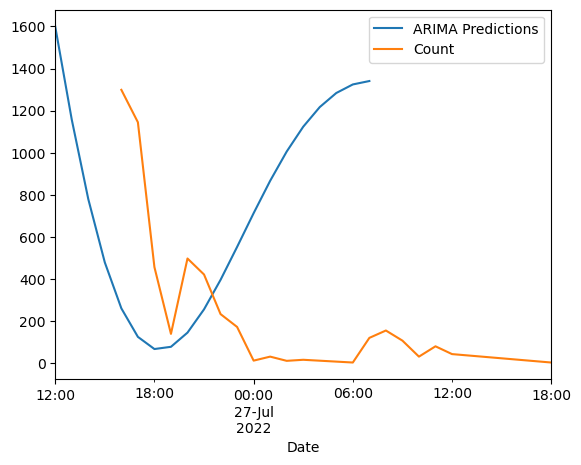

In [26]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True)
test['Count'].plot(legend=True)

In [27]:
from sklearn.metrics import mean_squared_error
from math import sqrt
test['Count'].mean()
rmse=sqrt(mean_squared_error(pred,test['Count']))
print(rmse)

710.1141566154442
